# Implimentation of LoRA from Scratch using Pytorch

## 01. Basic concept of LoRA

In [1]:
import torch

In [5]:
W = torch.LongTensor([[1,1,2],
                      [3,1,2],
                      [3,4,1]])

In [7]:
d = W.size(0)
k = W.size(1)

In [15]:
r = 2
A = torch.rand(d,r)
B = torch.rand(r,k)
C = A@B
D = W + C

In [16]:
A

tensor([[0.9791, 0.0273],
        [0.6520, 0.8451],
        [0.8805, 0.0313]])

In [17]:
B

tensor([[0.1678, 0.4945, 0.0352],
        [0.1535, 0.5195, 0.0908]])

In [20]:
C

tensor([[0.1685, 0.4984, 0.0369],
        [0.2392, 0.7614, 0.0997],
        [0.1526, 0.4517, 0.0338]])

In [21]:
D

tensor([[1.1685, 1.4984, 2.0369],
        [3.2392, 1.7614, 2.0997],
        [3.1526, 4.4517, 1.0338]])

## 02. Lora in Pytorch

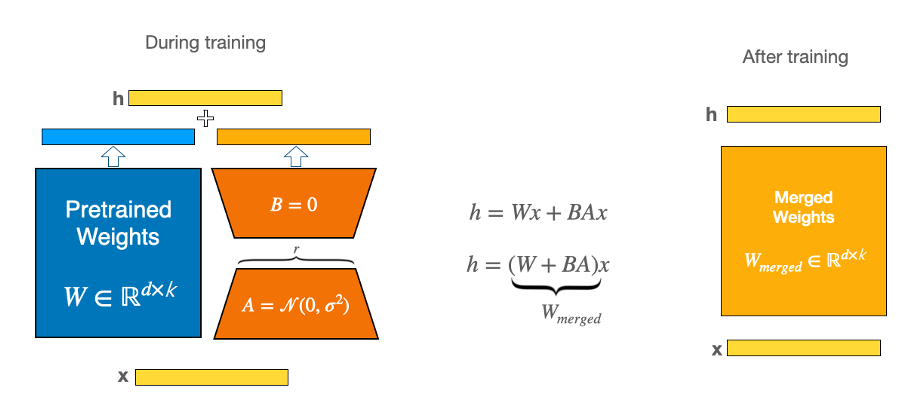

In [87]:
import torch
import torch.nn as nn
r = 2 # of RANK
d = 5 # of dim of W
k = 7 # of dim of W
W = nn.Linear(d,k)
A = nn.Linear(d,r)
B = nn.Linear(r,k)

In [88]:
x = torch.rand(3,d)

In [93]:
model_out = x @ W.weight.T
print(model_out)

tensor([[ 0.2623,  0.5047, -0.3954,  0.0075, -0.2403,  0.7900, -0.1682],
        [ 0.1031,  0.3503, -0.5271, -0.0959, -0.4584,  0.5662,  0.3333],
        [ 0.1906,  0.3685, -0.1884, -0.0803, -0.2886,  0.5590,  0.1233]],
       grad_fn=<MmBackward0>)


In [94]:
lora_out = x @ A.weight.T @ B.weight.T
print(lora_out)

tensor([[-0.3777, -0.0277,  0.1669,  0.2973,  0.0817,  0.0033,  0.2428],
        [-0.1907, -0.0613,  0.0772,  0.1583,  0.1567, -0.1064,  0.2359],
        [-0.2603, -0.0422,  0.1115,  0.2089,  0.1126, -0.0505,  0.2227]],
       grad_fn=<MmBackward0>)


In [96]:
merged_out = model_out + lora_out
print(merged_out)

tensor([[-0.1154,  0.4771, -0.2285,  0.3047, -0.1586,  0.7934,  0.0746],
        [-0.0876,  0.2890, -0.4500,  0.0624, -0.3017,  0.4598,  0.5692],
        [-0.0698,  0.3263, -0.0768,  0.1286, -0.1760,  0.5085,  0.3459]],
       grad_fn=<AddBackward0>)


In [102]:
tmp = A.weight.T @ B.weight.T
print(tmp.T)

tensor([[-0.2936,  0.0376,  0.2415,  0.1734, -0.3395],
        [-0.0212,  0.0711,  0.0258, -0.0193, -0.0683],
        [ 0.1298, -0.0064, -0.1055, -0.0814,  0.1435],
        [ 0.2310, -0.0414, -0.1915, -0.1310,  0.2747],
        [ 0.0626, -0.1747, -0.0721,  0.0406,  0.1792],
        [ 0.0034,  0.1557,  0.0164, -0.0747, -0.0961],
        [ 0.1879, -0.1877, -0.1747, -0.0348,  0.3221]],
       grad_fn=<PermuteBackward0>)


In [100]:
W.weight

Parameter containing:
tensor([[ 0.2063,  0.1595, -0.1073, -0.0308,  0.0739],
        [ 0.4053,  0.1043,  0.2600, -0.1446, -0.0242],
        [ 0.0635,  0.0274, -0.0766, -0.1748, -0.4459],
        [ 0.0420,  0.1410,  0.3899, -0.2170, -0.3356],
        [-0.0914, -0.0611, -0.3559, -0.3673,  0.1161],
        [ 0.4332,  0.3423, -0.0943,  0.1022,  0.3160],
        [-0.0883, -0.4124,  0.2665,  0.4421, -0.0681]], requires_grad=True)

In [104]:
x@(W.weight+tmp.T).T

tensor([[-0.1154,  0.4771, -0.2285,  0.3047, -0.1586,  0.7934,  0.0746],
        [-0.0876,  0.2890, -0.4500,  0.0624, -0.3017,  0.4598,  0.5692],
        [-0.0698,  0.3263, -0.0768,  0.1286, -0.1760,  0.5085,  0.3459]],
       grad_fn=<MmBackward0>)